# Exercici 1

### Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker


df = pd.read_csv('preu lloguer per trimestre i barri.csv')


'''Dins de "Lloguer_mitja" veiem que hi ha 2 unitats diferents (euros/mes i euros/m2 mes). Filtrarem per a que només
es vegin les dades de euros/mes.'''

df = df[~df['Lloguer_mitja'].str.contains("m2")]

df = df.reset_index(drop = True)


'''Com que ara totes les files de "Lloguer_mitja" tenen de valor euros/mes aquesta columna ja no té sentit. L'eliminarem
i renombrarem "Preu" per "Preu_Mitja_Euros/mes.'''

df = df.drop('Lloguer_mitja', axis=1)

df.rename(columns = {'Preu':'Preu_Mitja_Euros/mes'}, inplace = True)


'''En la columna "Preu_Mitja_Euros/mes" veiem que hi ha valors no numèrics que no estàn declarats com a NaN. 
Els convertim a NaN.'''

df['Preu_Mitja_Euros/mes'] = pd.to_numeric(df['Preu_Mitja_Euros/mes'], errors='coerce')


'''Substituïm els NaNs per la mitjana del preu del seu respectiu districte.'''

mitjana_preus = df.groupby('Nom_Districte')['Preu_Mitja_Euros/mes'].mean()

df['Preu_Mitja_Euros/mes'].fillna(df['Nom_Districte'].map(mitjana_preus), inplace=True)


print(df)


      Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri  \
0    2021          1               1  Ciutat Vella           1   
1    2021          1               1  Ciutat Vella           2   
2    2021          1               1  Ciutat Vella           3   
3    2021          1               1  Ciutat Vella           4   
4    2021          1               2      Eixample           5   
..    ...        ...             ...           ...         ...   
287  2021          4              10    Sant Martí          69   
288  2021          4              10    Sant Martí          70   
289  2021          4              10    Sant Martí          71   
290  2021          4              10    Sant Martí          72   
291  2021          4              10    Sant Martí          73   

                                        Nom_Barri  Preu_Mitja_Euros/mes  
0                                        el Raval                 759.2  
1                                  el Barri Gòtic          

### Crea almenys una visualització per:

### Una variable categòrica (Districte o Barri)

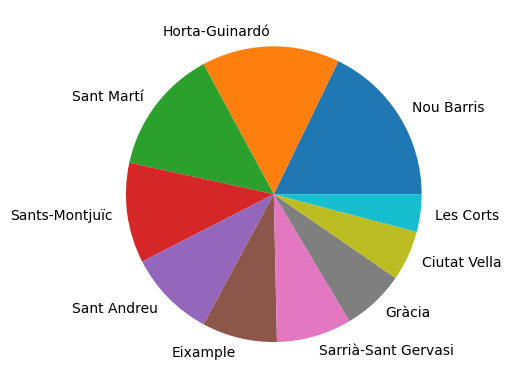

In [17]:
districtes = df.Nom_Districte.value_counts()
#print(df['Nom_Districte'].unique()) per copiar les etiquetes

mylabels = districtes.index

plt.pie(districtes, labels = mylabels)
plt.savefig('grafic_circular_districte.png', dpi=300, bbox_inches='tight')
plt.show()

En aquest gràfic circular podem veure la distribució dels lloguers segons districte. Com podem observar, la mostra més gran és la de Nou Barris.

### Una variable numèrica (Preu)

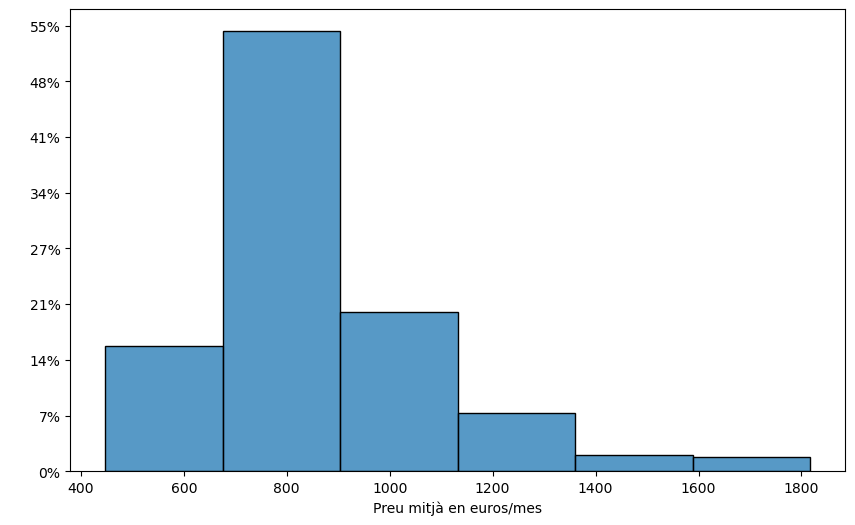

In [18]:
plt.figure(figsize=(10, 6))
plt.xlabel('Preu mitjà en euros/mes')
plt.ylabel(' ')
sns.histplot(df['Preu_Mitja_Euros/mes'], bins=6)
y_fmt = ticker.PercentFormatter(xmax=len(df['Preu_Mitja_Euros/mes']), decimals = 0)
plt.gca().yaxis.set_major_formatter(y_fmt)
plt.savefig('histograma_preu.png', dpi=300, bbox_inches='tight')
plt.show()

Aquest histograma mostra com més de la meitat dels lloguers ronden els 800€ mensuals i que els lloguers per sobre de 1400€
representen una part molt petita.

### Una variable numèrica i una categòrica (Districte i Preu)

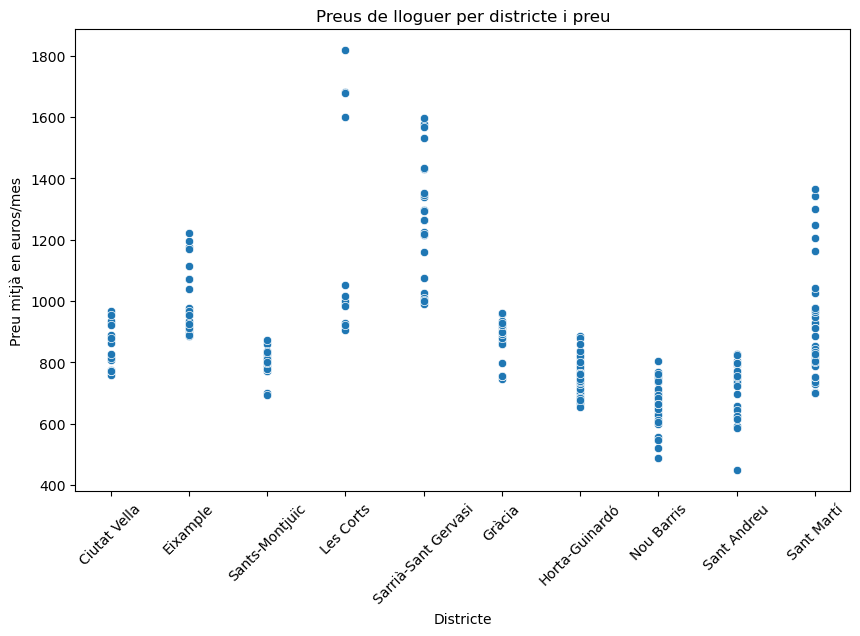

In [19]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Districte')
plt.ylabel('Preu mitjà en euros/mes')
plt.title('Preus de lloguer per districte i preu')
sns.scatterplot(x=df["Nom_Districte"], y=df["Preu_Mitja_Euros/mes"])
plt.savefig('districte_preu.png', dpi=300, bbox_inches='tight')
plt.show()

Distribució dels lloguers segons districte.

### Dues variables numèriques (Any o Trimestre i Preu)

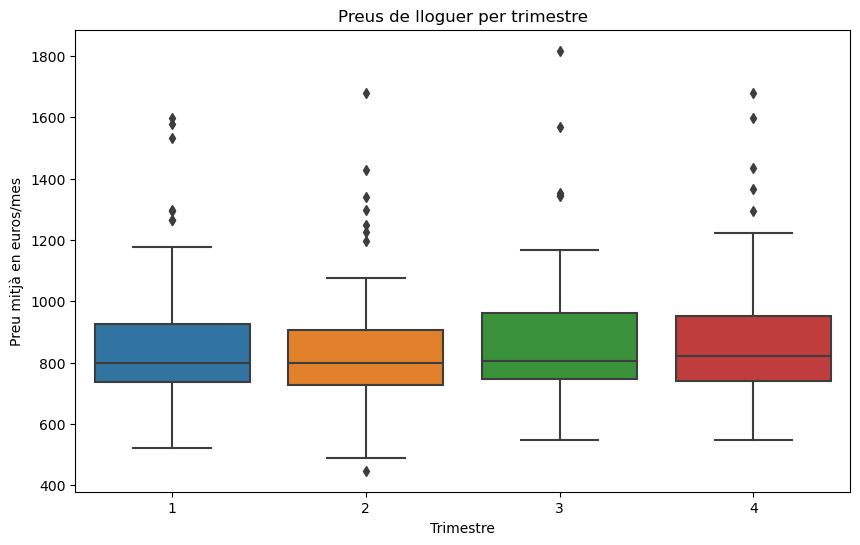

In [20]:
plt.figure(figsize=(10, 6))
plt.xlabel('Trimestre')
plt.title('Preus de lloguer per trimestre')
ax = sns.boxplot(x=df["Trimestre"], y=df["Preu_Mitja_Euros/mes"])
ax.set(ylabel="Preu mitjà en euros/mes")
plt.savefig('trimestre_preu.png', dpi=300, bbox_inches='tight')
plt.show()

En aquest diagrama de caixa podem veure les medianes i els valors atípics dels preus agrupats per trimestre.

### Tres variables (Barri o Districte, Trimestre i Preu)

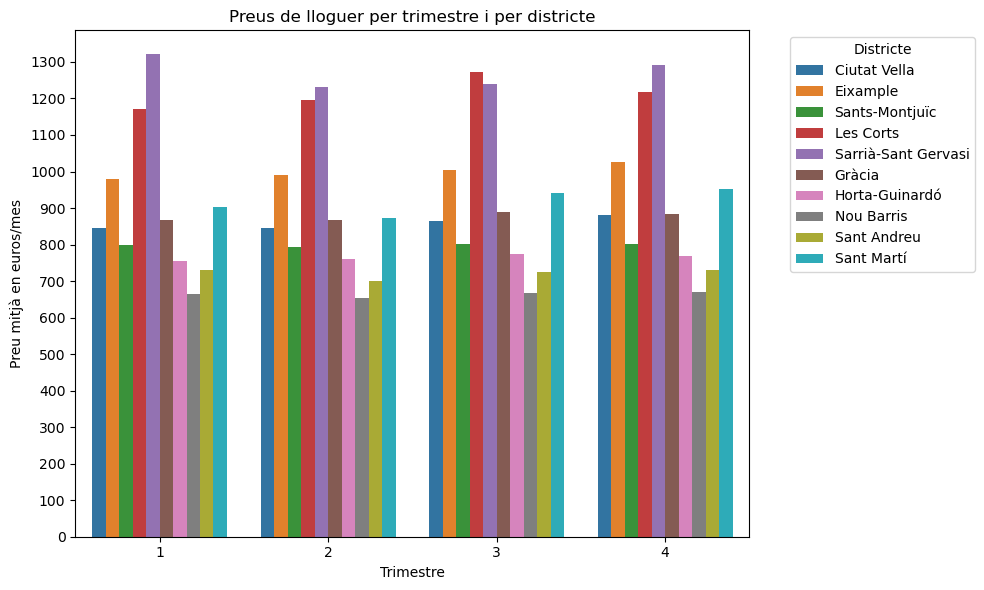

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Trimestre', y='Preu_Mitja_Euros/mes', hue='Nom_Districte', data=df, errorbar=None)
plt.xlabel('Trimestre')
plt.ylabel('Preu mitjà en euros/mes')
plt.title('Preus de lloguer per trimestre i per districte')
plt.legend(title='Districte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(range(0, 1400, 100))
plt.tight_layout()
plt.savefig('districte_trimestre_preu.png', dpi=300, bbox_inches='tight')
plt.show()

Distribució dels preus mitjans de lloguer segons districte i agrupats per trimestre. No veiem diferències significatives.

# Exercici 2
### Exporta els gràfics com imatges o com HTML.

Ho he fet amb cada gràfic amb el mètode plt.savefig

# Exercici 3
### Proposa alguna visualització que creguis que pot resultar interessant.

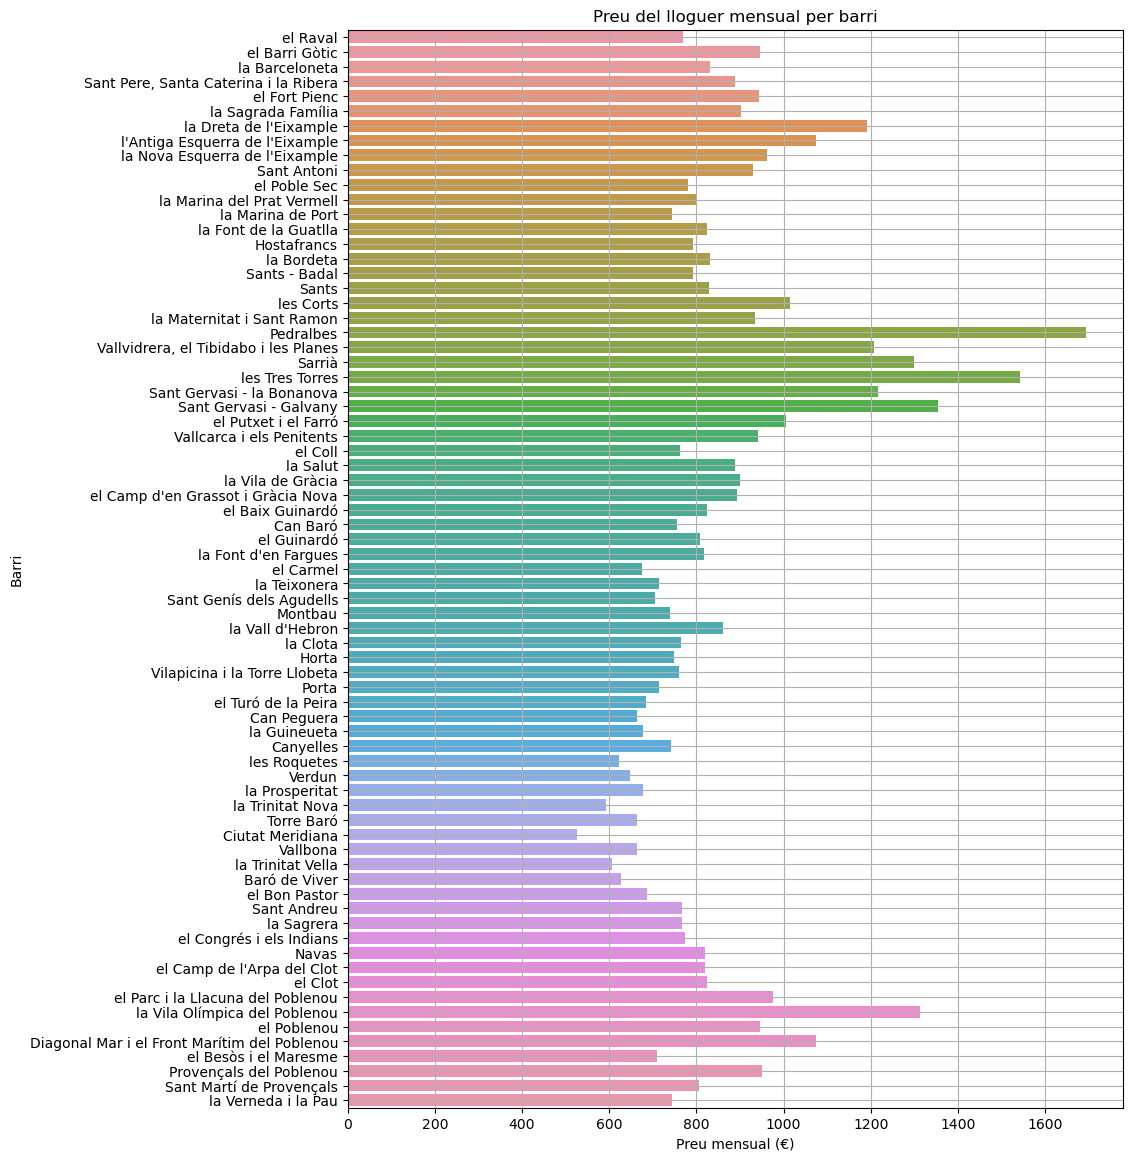

In [36]:
plt.figure(figsize=(10, 14))
sns.barplot(y='Nom_Barri', x='Preu_Mitja_Euros/mes', data=df, errorbar=None)
plt.ylabel('Barri')
plt.xlabel('Preu mensual (€)')
plt.title('Preu del lloguer mensual per barri')
plt.grid(True) 
plt.show()